In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [226]:
cab_fare = pd.read_csv("train_cab.csv")

In [227]:
warnings.filterwarnings("ignore")

In [228]:
cab_fare.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [229]:
cab_fare.shape

(16067, 7)

In [230]:
cab_fare['fare_amount'] = cab_fare['fare_amount'].replace('-','',regex = True).astype('float64')

In [231]:
cab_fare.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [232]:
cab_fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16043.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.041919,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.459960,10.578384,6.826587,10.575062,6.187087,60.844122
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [233]:
#look for anomalies in passenger count
cab_fare['passenger_count'].value_counts()

1.00       11259
2.00        2322
5.00        1045
3.00         676
4.00         329
6.00         302
0.00          57
43.00          2
53.00          2
0.12           1
1.30           1
531.20         1
345.00         1
456.00         1
87.00          1
55.00          1
58.00          1
236.00         1
535.00         1
536.00         1
537.00         1
554.00         1
5334.00        1
35.00          1
5345.00        1
557.00         1
354.00         1
Name: passenger_count, dtype: int64

In [234]:
cab_fare.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [235]:
#convert datetime
cab_fare['pickup_datetime'] = pd.to_datetime(cab_fare['pickup_datetime'], errors = 'coerce', utc=True)

In [236]:
cab_fare.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [237]:
#feature engineering
cab_fare['year'] = cab_fare['pickup_datetime'].dt.year
cab_fare['month'] = cab_fare['pickup_datetime'].dt.month
cab_fare['days_of_week'] = cab_fare['pickup_datetime'].dt.dayofweek
cab_fare['hour'] = cab_fare['pickup_datetime'].dt.hour
cab_fare['weekend'] = cab_fare['days_of_week'].map({0:0,1:0,2:0,3:0,4:0,5:1,6:1})

In [238]:
a = [9,10,11,12,17,18,19,20]
cab_fare['peak_hour'] = cab_fare['hour'].apply(lambda x: 1 if x in a else 0)

In [239]:
cab_fare['peak_hour'].value_counts()

0    9358
1    6709
Name: peak_hour, dtype: int64

In [240]:
cab_fare.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
year                             float64
month                            float64
days_of_week                     float64
hour                             float64
weekend                          float64
peak_hour                          int64
dtype: object

In [241]:


cab_fare.isnull().sum()

fare_amount          24
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
year                  1
month                 1
days_of_week          1
hour                  1
weekend               1
peak_hour             0
dtype: int64

In [242]:
cab_fare.dropna(axis = 0, how = 'any',inplace = True)
#cab_fare.drop(cab_fare[cab_fare['passenger_count'] > 6],axis=0,inplace = True)

In [243]:
cab_fare.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
days_of_week         0
hour                 0
weekend              0
peak_hour            0
dtype: int64

In [244]:
#removing anomalies 
cab_fare = cab_fare.loc[~((cab_fare['passenger_count']==0)|(cab_fare['passenger_count']>6) | (cab_fare['passenger_count']==0.12) | (cab_fare['passenger_count']==1.30))]


In [245]:
cab_fare.shape

(15909, 13)

In [246]:
for i in range (-6,0):
    print (cab_fare.columns[i])
    print (cab_fare.iloc[:,i].value_counts())

year
2012.0    2551
2013.0    2506
2010.0    2486
2009.0    2466
2011.0    2454
2014.0    2302
2015.0    1144
Name: year, dtype: int64
month
3.0     1507
5.0     1494
6.0     1483
1.0     1459
4.0     1426
2.0     1316
10.0    1271
12.0    1238
11.0    1216
9.0     1209
7.0     1169
8.0     1121
Name: month, dtype: int64
days_of_week
5.0    2436
4.0    2366
3.0    2308
2.0    2290
1.0    2261
6.0    2145
0.0    2103
Name: days_of_week, dtype: int64
hour
19.0    984
18.0    979
20.0    961
21.0    916
22.0    900
12.0    790
14.0    787
9.0     777
13.0    774
17.0    772
23.0    769
11.0    732
15.0    731
8.0     700
10.0    662
16.0    652
7.0     637
0.0     601
1.0     463
6.0     335
2.0     329
3.0     291
4.0     204
5.0     163
Name: hour, dtype: int64
weekend
0.0    11328
1.0     4581
Name: weekend, dtype: int64
peak_hour
0    9252
1    6657
Name: peak_hour, dtype: int64


In [247]:
#changing into categories
for i in range (-7,0):
    cab_fare.iloc[:,i] = cab_fare.iloc[:,i].astype('category')

In [248]:
cab_fare.iloc[1016]

fare_amount                              49.57
pickup_datetime      2009-12-08 06:24:00+00:00
pickup_longitude                      -73.7767
pickup_latitude                        40.6454
dropoff_longitude                     -73.9805
dropoff_latitude                       40.7708
passenger_count                              1
year                                      2009
month                                       12
days_of_week                                 1
hour                                         6
weekend                                      0
peak_hour                                    0
Name: 1075, dtype: object

In [249]:
cab_fare.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                 category
year                            category
month                           category
days_of_week                    category
hour                            category
weekend                         category
peak_hour                       category
dtype: object

In [250]:
 #univariate analysis
cab_fare.iloc[1013,:]

fare_amount                               4343
pickup_datetime      2012-01-15 20:42:04+00:00
pickup_longitude                      -73.9763
pickup_latitude                        40.7516
dropoff_longitude                     -74.0149
dropoff_latitude                        40.709
passenger_count                              1
year                                      2012
month                                        1
days_of_week                                 6
hour                                        20
weekend                                      1
peak_hour                                    1
Name: 1072, dtype: object

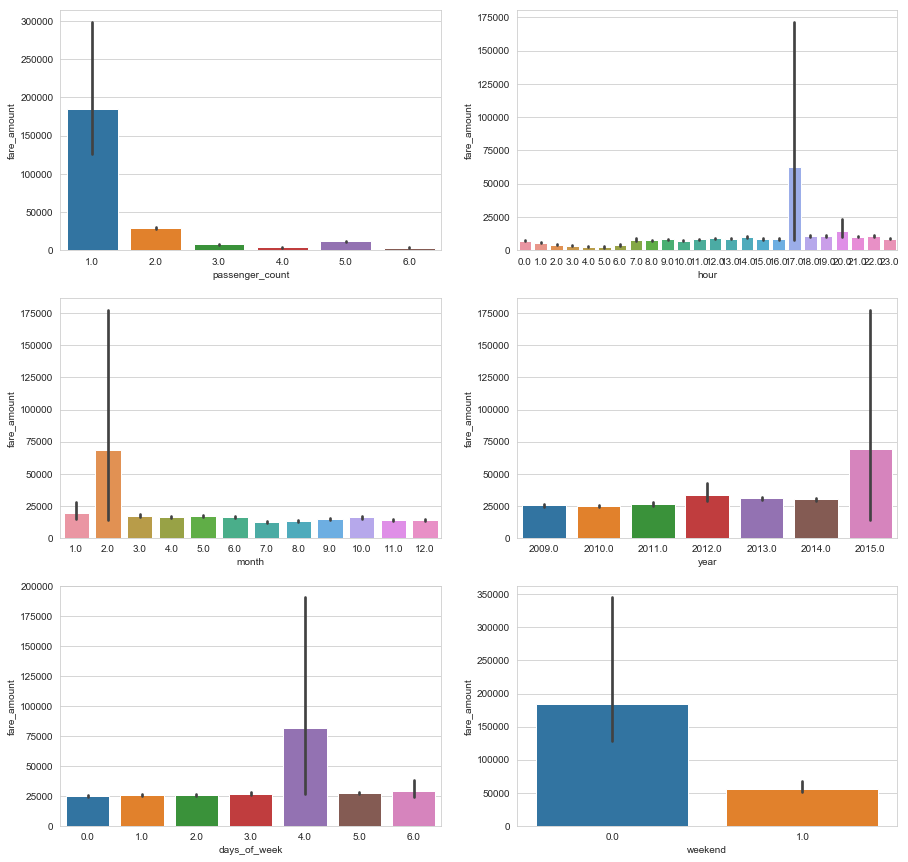

In [251]:
#bar graphs
sns.set_style("whitegrid")
plt.figure(figsize = (15,15))
plt.subplot(3,2,1)
sns.barplot("passenger_count","fare_amount",estimator = sum, data=cab_fare)
plt.subplot(3,2,2)
sns.barplot("hour","fare_amount",estimator = sum, data=cab_fare)
plt.subplot(3,2,3)
sns.barplot("month","fare_amount",estimator = sum, data=cab_fare)
plt.subplot(3,2,4)
sns.barplot("year","fare_amount",estimator = sum, data=cab_fare)
plt.subplot(3,2,5)
sns.barplot("days_of_week","fare_amount",estimator = sum, data=cab_fare)
plt.subplot(3,2,6)
sns.barplot("weekend","fare_amount",estimator = sum, data=cab_fare)


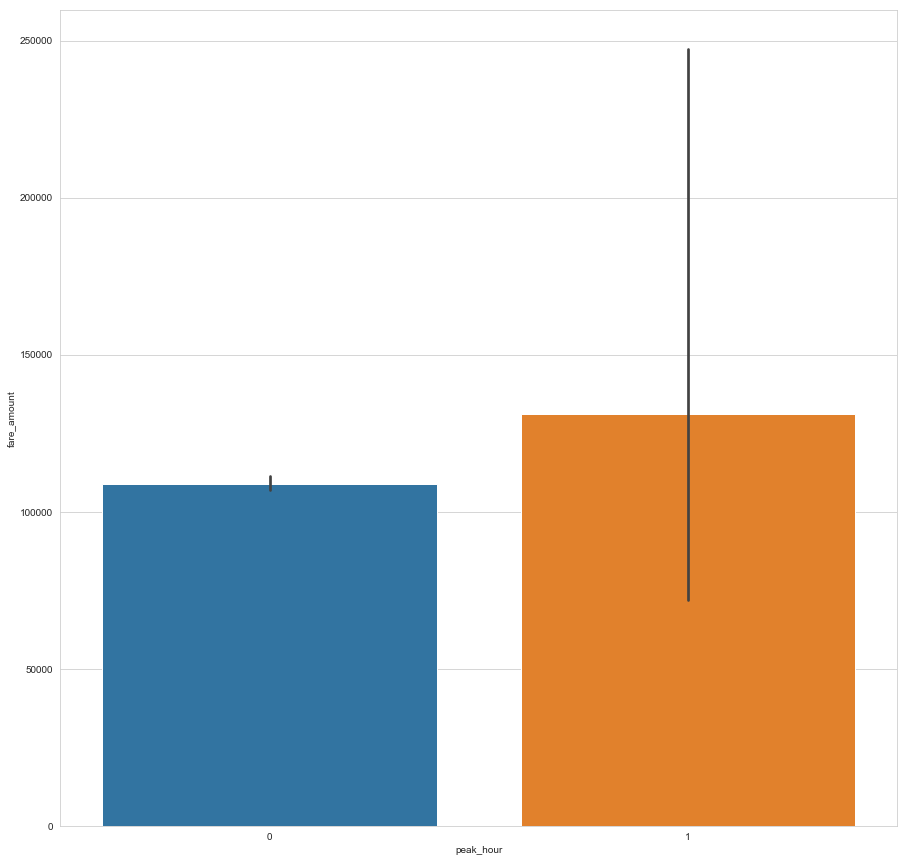

In [252]:
#outlier analysis
plt.figure(figsize = (15,15))
sns.barplot("peak_hour","fare_amount",estimator = sum, data=cab_fare)

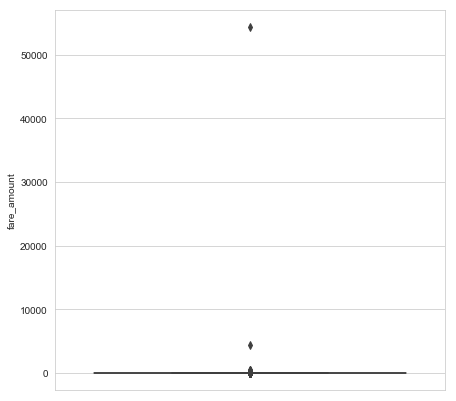

In [253]:
plt.figure(figsize = (7,7))
sns.boxplot(cab_fare.iloc[:,0],orient ='v')

Text(0,0.5,'dropoff_latitude')

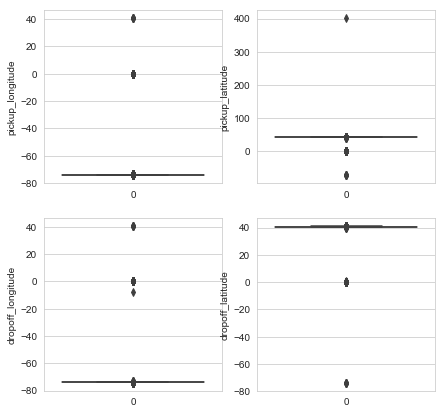

In [254]:
plt.figure(figsize = (7,7))
plt.subplot(2,2,1)
sns.boxplot(data = cab_fare['pickup_longitude'],orient ='v',)
plt.ylabel('pickup_longitude')
plt.subplot(2,2,2)
sns.boxplot(data = cab_fare['pickup_latitude'],orient ='v')
plt.ylabel('pickup_latitude')
plt.subplot(2,2,3)
sns.boxplot(data = cab_fare['dropoff_longitude'],orient ='v')
plt.ylabel('dropoff_longitude')
plt.subplot(2,2,4)
sns.boxplot(data = cab_fare['dropoff_latitude'],orient ='v')
plt.ylabel('dropoff_latitude')

In [255]:
#removing outliers
var = ["fare_amount","pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude"]
for i in var:
    median = cab_fare[i].median()
    q_25,q_75 = np.percentile(cab_fare[i],[25,75])
    iqr = q_75 -q_25
    max_out = q_75 + (iqr*2)
    min_out = q_25 - (iqr*2)
    cab_fare = cab_fare.drop(cab_fare[cab_fare[i]>max_out].index)
    cab_fare = cab_fare.drop(cab_fare[cab_fare[i]<min_out].index)


In [256]:
cab_fare.shape

(13788, 13)

In [257]:
cab_fare.shape

(13788, 13)

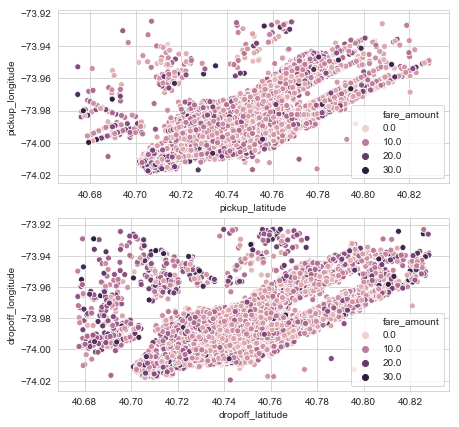

In [258]:
plt.figure(figsize = (7,7))
plt.subplot(2,1,1)
sns.scatterplot("pickup_latitude","pickup_longitude",hue = "fare_amount",data= cab_fare)
plt.subplot(2,1,2)
sns.scatterplot("dropoff_latitude","dropoff_longitude",hue = "fare_amount",data= cab_fare)

In [259]:
#generating distance using haversine
def trip_distance(lat1, lat2, lon1,lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))
cab_fare['trip_distance']=cab_fare.apply(lambda row:trip_distance(row['pickup_latitude'],row['dropoff_latitude'],row['pickup_longitude'],row['dropoff_longitude']),axis=1)
cab_fare['trip_distance'] = cab_fare['trip_distance']*1.57 #conversion to kms

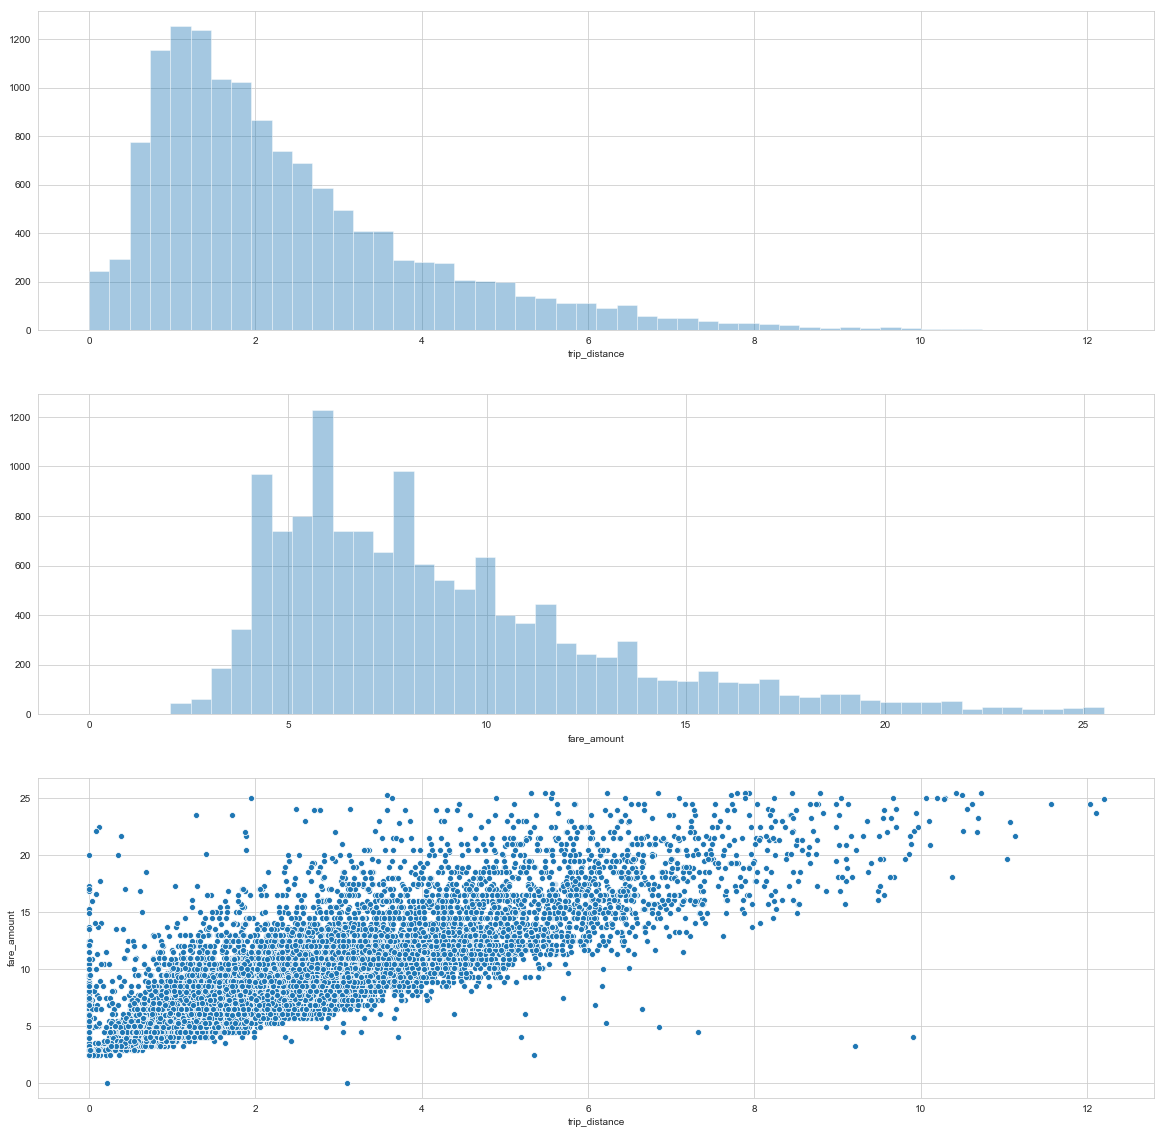

In [260]:
plt.figure(figsize = (20,20))
plt.subplot(3,1,1)
sns.distplot(cab_fare['trip_distance'],kde = False)
plt.subplot(3,1,2)
sns.distplot(cab_fare['fare_amount'],kde = False)
plt.subplot(3,1,3)
sns.scatterplot('trip_distance','fare_amount',data = cab_fare)


In [261]:
from scipy.stats import shapiro

In [262]:
#shapiro test
print (shapiro(cab_fare['fare_amount']))
print (shapiro(cab_fare['trip_distance']))

(0.9024714827537537, 0.0)
(0.8828741312026978, 0.0)


In [263]:
#correlation matrix
cab_fare.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance
fare_amount,1.000000,-0.060229,-0.092617,0.025915,-0.100421,0.824713
pickup_longitude,-0.060229,1.000000,0.664116,0.390694,0.330198,-0.061146
pickup_latitude,-0.092617,0.664116,1.000000,0.299267,0.510799,-0.090755
dropoff_longitude,0.025915,0.390694,0.299267,1.000000,0.599430,0.060257
dropoff_latitude,-0.100421,0.330198,0.510799,0.599430,1.000000,-0.049706
trip_distance,0.824713,-0.061146,-0.090755,0.060257,-0.049706,1.000000


In [264]:
cab_fare.head(1).T

,1
fare_amount,16.9
pickup_datetime,2010-01-05 16:52:16+00:00
pickup_longitude,-74.016
pickup_latitude,40.7113
dropoff_longitude,-73.9793
dropoff_latitude,40.782
passenger_count,1
year,2010
month,1
days_of_week,1


In [265]:
#anova test using ols lm model
import statsmodels.formula.api as smf
anova1 = smf.ols(formula='fare_amount~ passenger_count',data = cab_fare).fit()
print (anova1.f_pvalue)
anova2 = smf.ols(formula='fare_amount~ year',data = cab_fare).fit()
print (anova2.f_pvalue)
anova3 = smf.ols(formula='fare_amount~ month',data = cab_fare).fit()
print (anova3.f_pvalue)
anova4 = smf.ols(formula='fare_amount~ days_of_week',data = cab_fare).fit()
print (anova4.f_pvalue)
anova5 = smf.ols(formula='fare_amount~ hour',data = cab_fare).fit()
print (anova5.f_pvalue)
anova6 = smf.ols(formula='fare_amount~ weekend',data = cab_fare).fit()
print (anova6.f_pvalue)
anova7 = smf.ols(formula='fare_amount~ peak_hour',data = cab_fare).fit()
print (anova7.f_pvalue)

0.0002061093788704811
7.331673050928289e-90
1.0162497884115332e-06
0.08205843439959792
1.0709698016899533e-07
0.08112388104927275
0.3715472179806081


In [268]:
#dropping insignificant
cab_fare.drop(['pickup_datetime','days_of_week','weekend','peak_hour'],axis =1 ,inplace = True)

# Modelling

In [269]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [270]:
#creating dummies
df = cab_fare.copy()
cat_names = ["passenger_count","year","month","hour"]
for i in cat_names:
    temp = pd.get_dummies(df[i],prefix = i)
    df = df.join(temp)
   

In [271]:
df.drop(["passenger_count","year","month","hour"],axis = 1, inplace =True)

In [272]:
#creating train test
train,test = train_test_split(df,test_size = 0.2,random_state = 0)

In [273]:
print (train.shape)
print (test.shape)

(11030, 55)
(2758, 55)


In [274]:
model_lm = sm.OLS(train.iloc[:,0].astype('float'),train.iloc[:,1:60].astype('float')).fit()

In [275]:
model_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     603.1
Date:                Sun, 26 May 2019   Prob (F-statistic):               0.00
Time:                        21:58:26   Log-Likelihood:                -24314.
No. Observations:               11030   AIC:                         4.873e+04
Df Residuals:                   10979   BIC:                         4.910e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
pickup_longitude       -0.8404      1.830     -0.459      0.646      -4.428       2.747
pickup_latitude         2.4130      1.422      1.697      0.090      -0.374       5.200
dropoff_longitude       6.3126      1.632      3.868      0.000       3.113       9.512
dropoff_latitude      -16.8030      1.238    -13.573      0.000     -19.230     -14.376
trip_distance           2.0800      0.013    165.330      0.000       2.055       2.105
passenger_count_1.0   381.5962     73.306      5.206      0.000     237.903     525.289
passenger_count_2.0   381.7302     73.308      5.207      0.000     238.034     525.426
passenger_count_3.0   381.8955     73.309      5.209      0.000     238.196     525.595
passenger_count_4.0   381.8636     73.307      5.209      0.000     238.168     525.559
passenger_count_5.0   381.6996     73.307      5.207      0.000     238.005     525.394
passenger_count_6.0   381.8113     73.307      5.208      0.000     238.116     525.507
year_2009.0           326.3818     62.834      5.194      0.000     203.215     449.548
year_2010.0           326.3242     62.836      5.193      0.000     203.155     449.494
year_2011.0           326.3933     62.835      5.194      0.000     203.225     449.561
year_2012.0           327.0182     62.835      5.204      0.000     203.850     450.186
year_2013.0           327.8287     62.835      5.217      0.000     204.661     450.997
year_2014.0           328.1301     62.835      5.222      0.000     204.962     451.298
year_2015.0           328.5201     62.834      5.228      0.000     205.355     451.686
month_1.0             190.4547     36.653      5.196      0.000     118.608     262.301
month_2.0             190.6594     36.654      5.202      0.000     118.811     262.508
month_3.0             190.6418     36.653      5.201      0.000     118.795     262.489
month_4.0             190.7094     36.654      5.203      0.000     118.861     262.558
month_5.0             190.9325     36.654      5.209      0.000     119.084     262.781
month_6.0             190.8029     36.655      5.205      0.000     118.953     262.653
month_7.0             190.8665     36.653      5.207      0.000     119.019     262.713
month_8.0             190.7055     36.654      5.203      0.000     118.857     262.554
month_9.0             191.3064     36.654      5.219      0.000     119.457     263.155
month_10.0            191.2200     36.654      5.217      0.000     119.372     263.068
month_11.0            191.1597     36.654      5.215      0.000     119.312     263.007
month_12.0            191.1378     36.653      5.215      0.000     119.291     262.985
hour_0.0               95.1017     18.327      5.189      0.000      59.178     131.026
hour_1.0               94.9845     18.322      5.184      0.000      59.069     130.900
hou

In [276]:
#mean squared error
from sklearn.metrics import mean_squared_error  

In [277]:
predict_lm = model_lm.predict(test.iloc[:,1:59])

In [278]:
np.sqrt(mean_squared_error(test.iloc[:,0],predict_lm))

2.2091317068299214

In [279]:
#r2_score in test
from sklearn.metrics import r2_score
r2_score(test.iloc[:,0],predict_lm)

0.7244020025836577

In [280]:
#dropping high p value variables
train.drop(['pickup_longitude','pickup_latitude'],axis = 1,inplace = True)

In [281]:
test.drop(['pickup_longitude','pickup_latitude'],axis = 1,inplace = True)

In [282]:
model_lm = sm.OLS(train.iloc[:,0].astype('float'),train.iloc[:,1:58].astype('float')).fit()

In [283]:
model_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     628.0
Date:                Sun, 26 May 2019   Prob (F-statistic):               0.00
Time:                        21:58:30   Log-Likelihood:                -24316.
No. Observations:               11030   AIC:                         4.873e+04
Df Residuals:                   10981   BIC:                         4.909e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dropoff_longitude       6.1235      1.537      3.985      0.000       3.111       9.136
dropoff_latitude      -15.7881      1.106    -14.276      0.000     -17.956     -13.620
trip_distance           2.0787      0.013    165.819      0.000       2.054       2.103
passenger_count_1.0   421.9327     55.789      7.563      0.000     312.577     531.288
passenger_count_2.0   422.0664     55.790      7.565      0.000     312.708     531.425
passenger_count_3.0   422.2319     55.792      7.568      0.000     312.870     531.594
passenger_count_4.0   422.1975     55.792      7.567      0.000     312.835     531.560
passenger_count_5.0   422.0376     55.789      7.565      0.000     312.681     531.394
passenger_count_6.0   422.1489     55.790      7.567      0.000     312.790     531.508
year_2009.0           360.9566     47.820      7.548      0.000     267.221     454.692
year_2010.0           360.8984     47.821      7.547      0.000     267.161     454.636
year_2011.0           360.9659     47.821      7.548      0.000     267.228     454.704
year_2012.0           361.5915     47.821      7.561      0.000     267.854     455.329
year_2013.0           362.4020     47.821      7.578      0.000     268.665     456.139
year_2014.0           362.7040     47.820      7.585      0.000     268.968     456.439
year_2015.0           363.0966     47.819      7.593      0.000     269.363     456.830
month_1.0             210.6219     27.895      7.550      0.000     155.942     265.302
month_2.0             210.8279     27.895      7.558      0.000     156.149     265.507
month_3.0             210.8106     27.895      7.557      0.000     156.131     265.490
month_4.0             210.8764     27.896      7.559      0.000     156.196     265.557
month_5.0             211.0992     27.896      7.567      0.000     156.418     265.781
month_6.0             210.9726     27.895      7.563      0.000     156.293     265.652
month_7.0             211.0335     27.894      7.566      0.000     156.356     265.711
month_8.0             210.8729     27.895      7.560      0.000     156.194     265.552
month_9.0             211.4766     27.896      7.581      0.000     156.796     266.158
month_10.0            211.3876     27.896      7.578      0.000     156.706     266.069
month_11.0            211.3281     27.895      7.576      0.000     156.649     266.007
month_12.0            211.3079     27.895      7.575      0.000     156.630     265.986
hour_0.0              105.1783     13.947      7.541      0.000      77.840     132.516
hour_1.0              105.0547     13.943      7.535      0.000      77.725     132.385
hour_2.0              104.8139     13.943      7.518      0.000      77.484     132.144
hour_3.0              105.0732     13.940      7.538      0.000      77.748     132.398
hou

In [284]:
predict_lm = model_lm.predict(test.iloc[:,1:58])

In [285]:
np.sqrt(mean_squared_error(test.iloc[:,0],predict_lm))

2.208284548273025

In [286]:
r2_score(test.iloc[:,0],predict_lm)

0.7246133348772275

In [287]:
from sklearn import tree

In [288]:
#Decision TREE
model_dtr = tree.DecisionTreeRegressor(max_depth = 5).fit(train.iloc[:,1:58],train.iloc[:,0])

In [289]:
#predictions
predict_dtr = model_dtr.predict(test.iloc[:,1:58])

In [290]:
r2_score(test.iloc[:,0],predict_dtr)

0.6998234531499743

In [291]:
np.sqrt(mean_squared_error(test.iloc[:,0],predict_dtr))

2.3055362702619355

In [302]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [305]:
#RANDOM FOREST REGRESSOR
model_rfr = RandomForestRegressor(max_features = 'auto',n_estimators = 700).fit(train.iloc[:,1:58],train.iloc[:,0])

In [303]:
rfr = RandomForestRegressor()
paramters = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
gridsearch = GridSearchCV(rfr,paramters,scoring = 'mean_squared_error',n_jobs=-1)
gridsearch.fit(train.iloc[:,1:58],train.iloc[:,0])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=0)

In [306]:
gridsearch.scoring

'mean_squared_error'

In [307]:
predict_rfr = model_rfr.predict(test.iloc[:,1:58])

In [308]:
r2_score(test.iloc[:,0],predict_rfr)

0.7323506538400946

In [309]:
np.sqrt(mean_squared_error(test.iloc[:,0],predict_rfr))

2.1770413280974767

In [297]:
#processing test and then predicting it
test_fare = pd.read_csv('test.csv')
test_fare.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [298]:
test_fare['trip_distance']=test_fare.apply(lambda row:trip_distance(row['pickup_latitude'],row['dropoff_latitude'],row['pickup_longitude'],row['dropoff_longitude']),axis=1)
test_fare['trip_distance'] = test_fare['trip_distance']*1.57 

In [299]:
test_fare['pickup_datetime'] = pd.to_datetime(test_fare['pickup_datetime'], errors = 'coerce', utc=True)
test_fare['year'] = test_fare['pickup_datetime'].dt.year
test_fare['month'] = test_fare['pickup_datetime'].dt.month
test_fare['hour'] = test_fare['pickup_datetime'].dt.hour

In [300]:
cat_names = ["passenger_count","year","month","hour"]
for i in cat_names:
    temp = pd.get_dummies(test_fare[i],prefix = i)
    test_fare = test_fare.join(temp)

In [301]:
test_fare = test_fare.drop(['pickup_datetime','pickup_longitude','pickup_latitude','passenger_count','year','month','hour'],axis = 1)

In [185]:
test_fare.head()

,dropoff_longitude,dropoff_latitude,trip_distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year_2009,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,-73.981430,40.743835,2.266462,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-73.998886,40.739201,2.366060,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-73.979654,40.746139,0.603504,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-73.990448,40.751635,1.913091,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-73.988565,40.744427,5.255597,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [186]:
predict_test = model_lm.predict(test_fare)

In [187]:
predict_test.head()

0    10.251217
1    10.424534
2     5.201139
3     7.769034
4    14.842435
dtype: float64